In [28]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [29]:
def avg_last_execution(files_path, drift_detector, generator):
    
    results = []
    for file in files_path:
        #print(file)
        df = pd.read_csv(file)
        results.append(df.iloc[-1]['classifications correct (percent)'])
        #print(df.iloc[-1]['classifications correct (percent)'])
    
    tuple_results = tuple([np.mean(results), np.std(results), drift_detector, generator])
   
    #print(f'avg of all last execution: {np.mean(median)}')
    return tuple_results 

In [30]:
drift_detectors_params = [
                              {"id": "DDM", "drift_name": "DDM", "params": ""},    \
                              {"id": "EDDM", "drift_name": "EDDM", "params": ""},   \
                              {"id": "ADWIN", "drift_name": "ADWINChangeDetector", "params": ""},  \
                              {"id": "ECDD", "drift_name": "EWMAChartDM", "params": ""},   \
                              {"id": "STEPD", "drift_name": "STEPD", "params": ""},  \
                              {"id": "SeqDrift2", "drift_name": "SeqDrift2ChangeDetector", "params": ""},  \
                              {"id": "SEED", "drift_name": "SEEDChangeDetector", "params": ""},   \
                              {"id": "HDDM_A_Test", "drift_name": "HDDM_A_Test", "params": ""},  \
                              {"id": "HDDM_W_Test", "drift_name": "HDDM_W_Test", "params": ""},  \
                              #{"id": "FHDDM", "drift_name": "FHDDM", "params": ""},  \
                              #{"id": "FTDD", "drift_name": "FTDD", "params": ""},   \
                              {"id": "RDDM_30", "drift_name": "RDDM", "params": "-n 30 -w 2 -o 3"}, \
                              {"id": "RDDM","drift_name": "RDDM", "params": ""},   \
                              #{"id": "WSTD","drift_name": "WSTD", "params": ""}
                        ]

## Ranking Gradual HoeffdingTree

In [31]:
classificator = "trees.HoeffdingTree"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]
type_drift = "Gradual"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_gradual_ht = pd.concat([df_result_pivot_rank, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_gradual_ht.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.714286,1.428571,10.428571,4.000000,4.000000,5.000000,6.428571,5.142857,10.285714,8.857143,6.714286
std,1.799471,0.534522,0.786796,2.516611,1.290994,2.886751,1.511858,1.573592,0.755929,0.690066,2.360387
min,2.000000,1.000000,9.000000,1.000000,3.000000,1.000000,4.000000,3.000000,9.000000,8.000000,4.000000
25%,2.500000,1.000000,10.000000,1.500000,3.000000,3.000000,5.500000,4.000000,10.000000,8.500000,4.500000
50%,3.000000,1.000000,11.000000,6.000000,3.000000,5.000000,7.000000,5.000000,10.000000,9.000000,8.000000
75%,4.500000,2.000000,11.000000,6.000000,5.000000,7.000000,7.500000,6.500000,11.000000,9.000000,8.000000
max,7.000000,2.000000,11.000000,6.000000,6.000000,9.000000,8.000000,7.000000,11.000000,10.000000,10.000000


## Ranking Abrupt HoeffdingTree

In [32]:
classificator = "trees.HoeffdingTree"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]
type_drift = "Abrupt"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}


df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_abrupt_ht = pd.concat([df_result_pivot_rank, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_abrupt_ht.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.285714,2.285714,10.428571,4.142857,3.142857,5.285714,6.285714,5.571429,10.285714,8.571429,6.714286
std,2.497618,1.603567,0.786796,2.340126,1.214986,2.690371,1.976047,1.272418,0.755929,1.133893,2.360387
min,1.000000,1.000000,9.000000,1.000000,1.000000,2.000000,3.000000,4.000000,9.000000,7.000000,4.000000
25%,1.500000,1.000000,10.000000,2.000000,3.000000,3.000000,5.000000,4.500000,10.000000,8.000000,4.500000
50%,3.000000,2.000000,11.000000,6.000000,3.000000,6.000000,7.000000,6.000000,10.000000,9.000000,8.000000
75%,4.000000,3.000000,11.000000,6.000000,3.500000,7.000000,8.000000,6.500000,11.000000,9.000000,8.000000
max,8.000000,5.000000,11.000000,6.000000,5.000000,9.000000,8.000000,7.000000,11.000000,10.000000,10.000000


## Ranking Gradual NaiveBayes

In [33]:
classificator = "bayes.NaiveBayes"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]

type_drift = "Gradual"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_gradual_nb = pd.concat([df_result_pivot_rank, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_gradual_nb.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.000000,7.000000,10.285714,7.571429,3.714286,5.857143,4.428571,5.285714,7.285714,8.428571,4.142857
std,1.527525,3.741657,0.755929,3.359422,0.755929,2.911390,2.572751,1.799471,2.811541,0.975900,2.410295
min,1.000000,2.000000,9.000000,3.000000,3.000000,2.000000,1.000000,2.000000,4.000000,7.000000,1.000000
25%,1.000000,4.000000,10.000000,5.000000,3.000000,3.500000,2.500000,4.500000,5.500000,8.000000,2.500000
50%,1.000000,9.000000,10.000000,9.000000,4.000000,7.000000,5.000000,6.000000,6.000000,8.000000,4.000000
75%,2.500000,9.500000,11.000000,10.000000,4.000000,8.000000,6.500000,6.500000,9.500000,9.000000,5.500000
max,5.000000,11.000000,11.000000,11.000000,5.000000,9.000000,7.000000,7.000000,11.000000,10.000000,8.000000


## Ranking Abrup NaiveBayes

In [34]:
classificator = "bayes.NaiveBayes"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]

type_drift = "Abrupt"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_abrupt_nb = pd.concat([df_result_pivot_rank, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_abrupt_nb.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.000000,7.857143,10.285714,8.571429,3.285714,5.285714,4.142857,5.285714,6.285714,8.142857,4.857143
std,1.527525,2.968084,0.755929,2.636737,0.951190,3.450328,1.772811,2.214670,3.302236,1.069045,2.035401
min,1.000000,2.000000,9.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,7.000000,2.000000
25%,1.000000,7.000000,10.000000,8.500000,3.000000,2.000000,3.500000,5.000000,4.000000,7.500000,3.500000
50%,1.000000,9.000000,10.000000,9.000000,3.000000,7.000000,4.000000,5.000000,4.000000,8.000000,6.000000
75%,2.500000,9.500000,11.000000,10.000000,3.500000,8.000000,5.500000,6.500000,8.500000,8.500000,6.000000
max,5.000000,11.000000,11.000000,11.000000,5.000000,9.000000,6.000000,8.000000,11.000000,10.000000,7.000000


In [35]:
from autorank import autorank, plot_stats, create_report, latex_table

## Nemenyi test Gradual NaiveBayes 

In [36]:
result = autorank(df_result_pivot_rank_gradual_nb, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank       mean       std  ci_lower   ci_upper   
drift_detector                                                        
ADWIN            2.000000   2.000000  1.527525 -0.543032   4.543032  \
HDDM_A_Test      3.714286   3.714286  0.755929  2.455811    4.97276   
SeqDrift2        4.142857   4.142857  2.410295  0.130184    8.15553   
RDDM             4.428571   4.428571  2.572751  0.145442   8.711701   
RDDM_30          5.285714   5.285714  1.799471  2.289946   8.281483   
HDDM_W_Test      5.857143   5.857143  2.911390  1.010246   10.70404   
DDM              7.000000   7.000000  3.741657  0.770869  13.229131   
SEED             7.285714   7.285714  2.811541  2.605046  11.966383   
EDDM             7.571429   7.571429  3.359422  1.978645  13.164212   
STEPD            8.428571   8.428571  0.975900  6.803888  10.053255   
ECDD            10.285714  10.285714  0.755929   9.02724  11.544189   

               effect_size   magnitude  
drift_detector  

<Figure size 1040x800 with 0 Axes>

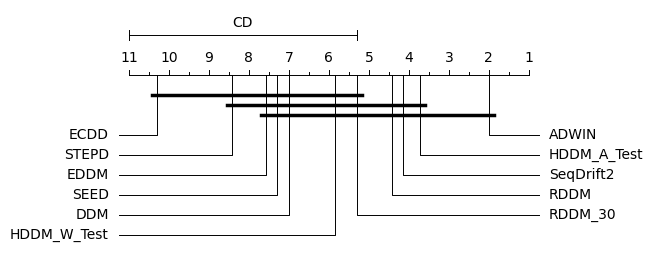

In [37]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi test Abrup NaiveBayes 

In [38]:
result = autorank(df_result_pivot_rank_abrupt_nb, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank  median  mad ci_lower ci_upper effect_size magnitude
drift_detector                                                                
ADWIN            2.000000     1.0  0.0      1.0      5.0         NaN     large
HDDM_A_Test      3.285714     3.0  0.0      2.0      5.0        -inf     large
RDDM             4.142857     4.0  1.0      1.0      6.0   -2.861622     large
SeqDrift2        4.857143     6.0  1.0      2.0      7.0    -4.76937     large
HDDM_W_Test      5.285714     7.0  2.0      1.0      9.0   -2.861622     large
RDDM_30          5.285714     5.0  1.0      1.0      8.0   -3.815496     large
SEED             6.285714     4.0  0.0      4.0     11.0        -inf     large
DDM              7.857143     9.0  2.0      2.0     11.0   -3.815496     large
STEPD            8.142857     8.0  1.0      7.0     10.0   -6.677118     large
EDDM             8.571429     9.0  1.0      3.0     11.0   -7.630992     large
ECDD            10.285714    10.0

/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


<Figure size 1040x800 with 0 Axes>

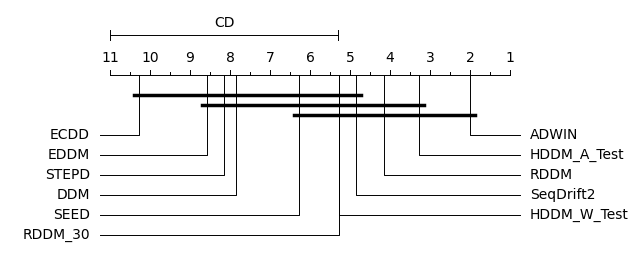

In [39]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi Test Abrup HT 

In [40]:
result = autorank(df_result_pivot_rank_abrupt_ht, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank       mean       std  ci_lower   ci_upper   
drift_detector                                                        
DDM              2.285714   2.285714  1.603567 -0.383913   4.955342  \
HDDM_A_Test      3.142857   3.142857  1.214986  1.120142   5.165572   
ADWIN            3.285714   3.285714  2.497618 -0.872333   7.443762   
EDDM             4.142857   4.142857  2.340126  0.247003   8.038712   
HDDM_W_Test      5.285714   5.285714  2.690371   0.80677   9.764658   
RDDM_30          5.571429   5.571429  1.272418    3.4531   7.689757   
RDDM             6.285714   6.285714  1.976047  2.995981   9.575448   
SeqDrift2        6.714286   6.714286  2.360387    2.7847  10.643871   
STEPD            8.571429   8.571429  1.133893  6.683717   10.45914   
SEED            10.285714  10.285714  0.755929   9.02724  11.544189   
ECDD            10.428571  10.428571  0.786796   9.11871  11.738433   

               effect_size   magnitude  
drift_detector  

<Figure size 1040x800 with 0 Axes>

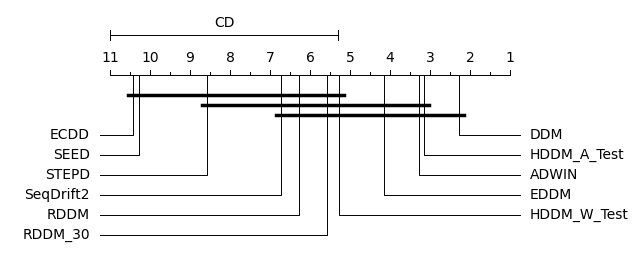

In [41]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi Test Gradual HT 

In [42]:
result = autorank(df_result_pivot_rank_gradual_ht, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank  median  mad ci_lower ci_upper effect_size magnitude
drift_detector                                                                
DDM              1.428571     1.0  0.0      1.0      2.0         NaN     large
ADWIN            3.714286     3.0  1.0      2.0      7.0   -1.907748     large
EDDM             4.000000     6.0  0.0      1.0      6.0        -inf     large
HDDM_A_Test      4.000000     3.0  0.0      3.0      6.0        -inf     large
HDDM_W_Test      5.000000     5.0  2.0      1.0      9.0   -1.907748     large
RDDM_30          5.142857     5.0  1.0      3.0      7.0   -3.815496     large
RDDM             6.428571     7.0  1.0      4.0      8.0   -5.723244     large
SeqDrift2        6.714286     8.0  2.0      4.0     10.0   -3.338559     large
STEPD            8.857143     9.0  0.0      8.0     10.0        -inf     large
SEED            10.285714    10.0  1.0      9.0     11.0   -8.584866     large
ECDD            10.428571    11.0

/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


<Figure size 1040x800 with 0 Axes>

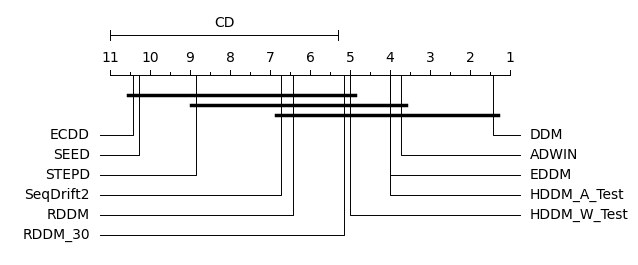

In [43]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()